In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [40]:
df = pd.read_csv('economics.csv', parse_dates=True)

In [117]:
df['Вид'].unique

<bound method Series.unique of 0     растениеводство и животноводство, охота и пред...
1                           лесоводство и лесозаготовки
2                             рыболовство и рыбоводство
3                                           добыча угля
4                        добыча нефти и природного газа
5                              добыча металлических руд
6                        производство пищевых продуктов
7                                 производство напитков
8                         производство табачных изделий
9                      производство текстильных изделий
10                                  производство одежды
11                  производство кожи и изделий из кожи
12    обработка древесины и производство изделий из ...
13               производство бумаги и бумажных изделий
14        деятельность полиграфическая и копирование...
15                  производство кокса и нефтепродуктов
16        производство химических веществ и химическ...
17        произво

In [41]:
interested_activities = ['образование', 'производство одежды']

In [42]:
data = df[df['Вид'].isin(interested_activities)]
data.head()

,Вид,2017,2018,2019,2020,2021,2022,2023
10,производство одежды,20299,19819,21065,20927,24312,27352,34049
43,образование,30258,34361,37072,39563,43391,48400,54263


In [43]:
data = data.set_index('Вид').transpose()

<AxesSubplot:>

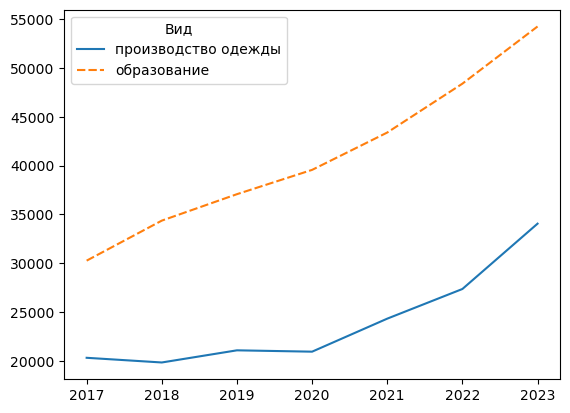

In [145]:
sns.lineplot(data=data)

Средняя заработная плата росла в образовании с 2017 по 2023 гг. В производстве одежды есть небольшое падение в 2018 по сравнению с предыдущим годом и резкое увеличение с 2020 г

In [26]:
infl = pd.read_csv('inflation.csv')

In [39]:
infl_df = infl[['Year', 'Total']]
infl_df.head()

,Year,Total
0,2023,7.42
1,2022,11.92
2,2021,8.39
3,2020,4.91
4,2019,3.05


In [44]:
data = data.reset_index()
data.rename(columns={'index': 'Year'}, inplace=True)

In [45]:
data['Year'] = data['Year'].astype(int)
infl_df['Year'] = infl_df['Year'].astype(int)

/var/folders/f0/t519cc2j4fg256swrt19f3f80000gn/T/ipykernel_7614/1351472694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infl_df['Year'] = infl_df['Year'].astype(int)


In [46]:
df = data.merge(infl_df[['Total', 'Year']], how='left', on='Year')

In [47]:
df.head()

,Year,производство одежды,образование,Total
0,2017,20299,30258,2.52
1,2018,19819,34361,4.27
2,2019,21065,37072,3.05
3,2020,20927,39563,4.91
4,2021,24312,43391,8.39


In [53]:
df['Производство одежды_с инфляцией']= (df['производство одежды'] - df['производство одежды']* df['Total']/100).astype(int)
df['Образование_с инфляцией']= (df['образование'] - df['образование']* df['Total']/100).astype(int)

df['Прирост зп в производстве одежды'] = (df['производство одежды']/df['производство одежды'].shift(1)*100 - 100).fillna(value=0).astype(int)
df['Прирост зп в образовании'] = (df['образование']/df['образование'].shift(1)*100 - 100).fillna(value=0).astype(int)


<AxesSubplot:xlabel='Year', ylabel='Средняя зарплата'>

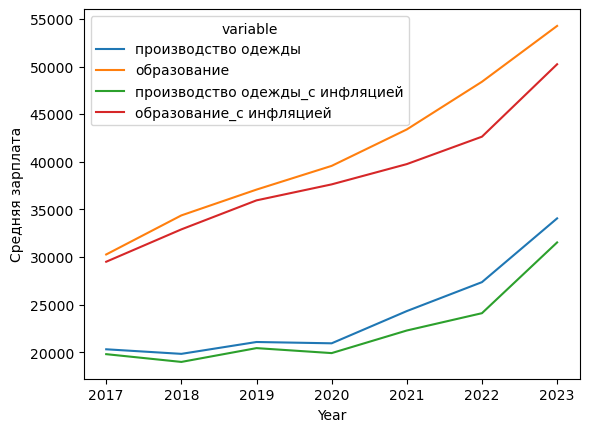

In [197]:
df.drop(columns=['Total'], inplace=True)
s = pd.melt(df, ['Year'])
s.rename(columns={'value': 'Средняя зарплата'}, inplace=True)
sns.lineplot(x='Year', y='Средняя зарплата', hue='variable', data=s)

Реальный рост зарплат ниже. С 2020 года инфляция начинает сильнее влиять на заработные платы. Рост замедляется, и в 2022 году по обоим видам заметен большой разрыв между реальным уровнем зп и номинальным. После 2022 года происходит резкий рост, где разрыв начинает уменьшаться

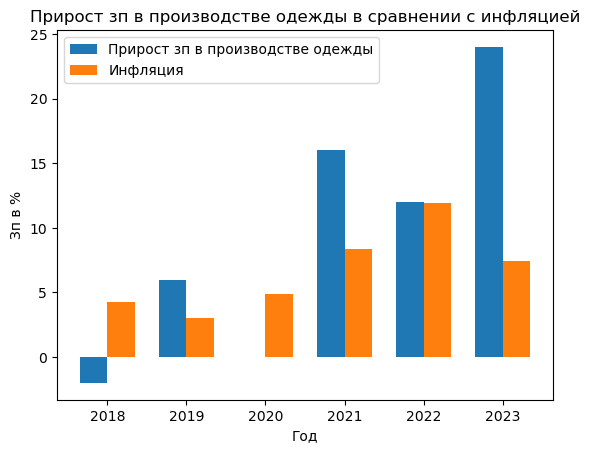

In [59]:
years = temp['Year']

x = np.arange(len(years))
bar_width = 0.35
fig, ax = plt.subplots()
bar1 = ax.bar(x - bar_width/2, temp['Прирост зп в производстве одежды'], bar_width, label='Прирост зп в производстве одежды')
bar2 = ax.bar(x + bar_width/2, temp['Total'], bar_width, label='Инфляция')

ax.set_xlabel('Год')
ax.set_ylabel('Зп в %')
ax.set_title('Прирост зп в производстве одежды в сравнении с инфляцией')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()

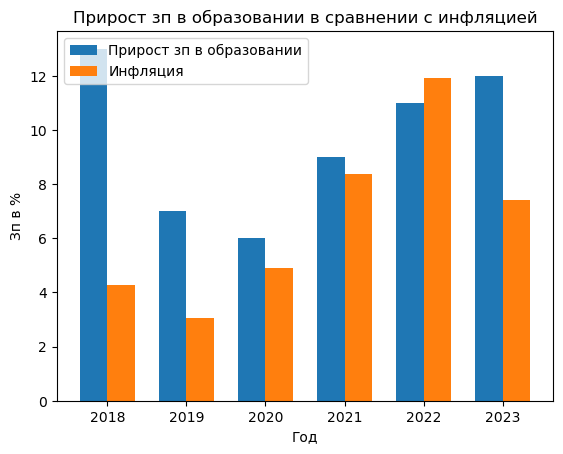

In [60]:
years = temp['Year']

x = np.arange(len(years))
bar_width = 0.35
fig, ax = plt.subplots()
bar1 = ax.bar(x - bar_width/2, temp['Прирост зп в образовании'], bar_width, label='Прирост зп в образовании')
bar2 = ax.bar(x + bar_width/2, temp['Total'], bar_width, label='Инфляция')

ax.set_xlabel('Год')
ax.set_ylabel('Зп в %')
ax.set_title('Прирост зп в образовании в сравнении с инфляцией')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()


Заметим, что в производстве одежды инфляция "съела" реальный рост зп в 2018 и 2020гг. Когда как в образовании рост зп превышает инфляцию

In [62]:
df.rename(columns={
    'Year': 'Год',
    'производство одежды': 'Производство одежды',
    'образование': 'Образование',
    'Total': 'Инфляция',
                 }, inplace=True)
df.to_csv('out.csv', index=False)

In [65]:
df

,Год,Производство одежды,Образование,Инфляция,Производство одежды_с инфляцией,Образование_с инфляцией,Прирост зп в производстве одежды,Прирост зп в образовании
0,2017,20299,30258,2.52,19787,29495,0,0
1,2018,19819,34361,4.27,18972,32893,-2,13
2,2019,21065,37072,3.05,20422,35941,6,7
3,2020,20927,39563,4.91,19899,37620,0,6
4,2021,24312,43391,8.39,22272,39750,16,9
5,2022,27352,48400,11.92,24091,42630,12,11
6,2023,34049,54263,7.42,31522,50236,24,12
